#1.Importing libraries


In [3]:

import pandas as pd #To hand with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots


#Loading dataset and Displaying data


In [5]:
df = pd.read_csv("/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.info()
print(df.columns)
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271287 entries, 0 to 271286
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    271287 non-null  float64
 1   V1      271287 non-null  float64
 2   V2      271287 non-null  float64
 3   V3      271287 non-null  float64
 4   V4      271287 non-null  float64
 5   V5      271287 non-null  float64
 6   V6      271287 non-null  float64
 7   V7      271287 non-null  float64
 8   V8      271287 non-null  float64
 9   V9      271286 non-null  float64
 10  V10     271286 non-null  float64
 11  V11     271286 non-null  float64
 12  V12     271286 non-null  float64
 13  V13     271286 non-null  float64
 14  V14     271286 non-null  float64
 15  V15     271286 non-null  float64
 16  V16     271286 non-null  float64
 17  V17     271286 non-null  float64
 18  V18     271286 non-null  float64
 19  V19     271286 non-null  float64
 20  V20     271286 non-null  float64
 21  V21     27

In [8]:
df = df.sample(frac=0.1, random_state = 1)
print(df.shape)
print(df.describe())



(27129, 31)
                Time            V1  ...        Amount         Class
count   27129.000000  27129.000000  ...  27129.000000  27129.000000
mean    91019.854584      0.001530  ...     90.573888      0.001696
std     45738.545309      1.931340  ...    273.415360      0.041144
min         0.000000    -34.549296  ...      0.000000      0.000000
25%     52505.000000     -0.927671  ...      5.740000      0.000000
50%     81106.000000      0.037287  ...     22.690000      0.000000
75%    134760.000000      1.298070  ...     78.890000      0.000000
max    164501.000000      2.430507  ...  18910.000000      1.000000

[8 rows x 31 columns]


In [9]:
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,27129.000000,27129.000000,27129.000000
mean,91019.854584,90.573888,0.001696
std,45738.545309,273.415360,0.041144
min,0.000000,0.000000,0.000000
25%,52505.000000,5.740000,0.000000
50%,81106.000000,22.690000,0.000000
75%,134760.000000,78.890000,0.000000
max,164501.000000,18910.000000,1.000000


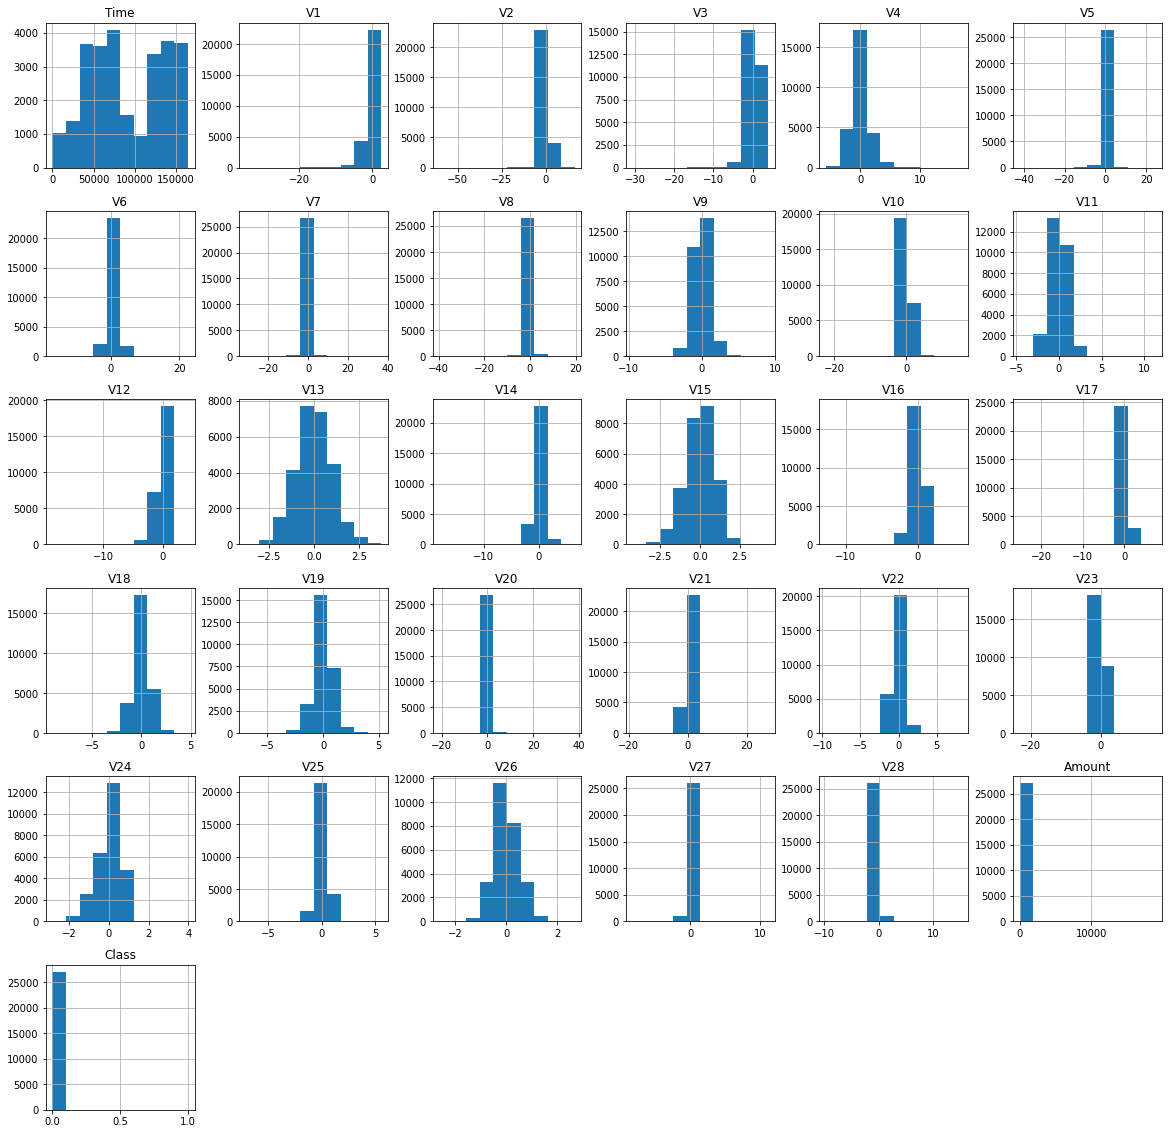

In [10]:
df.hist(figsize = (20,20))
plt.show()

In [11]:
# Determine number of fraud cases in dataset

Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))


0.0016984824428608353
Fraud Cases: 46
Valid Transactions: 27083


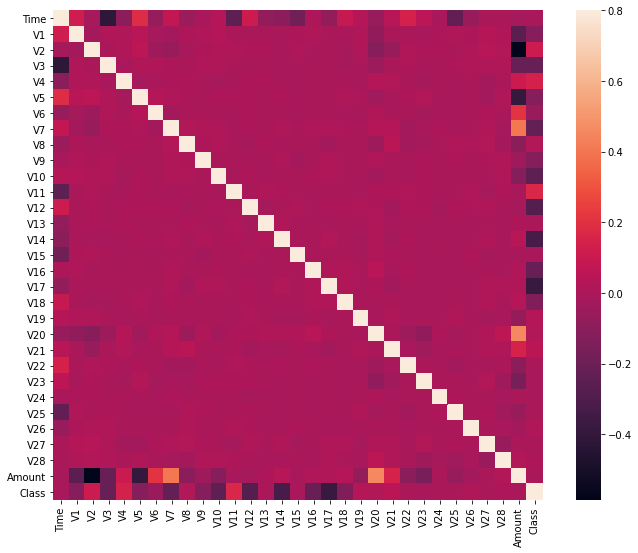

In [12]:
corrmat = df.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [13]:
# Get all the columns from the dataFrame
columns = df.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = df[columns]
Y = df[target]

# Print shapes
print(X.shape)
print(Y.shape)

(27129, 30)
(27129,)


#3.Unsupervised outlier Detection

In [14]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [16]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 61
0.9977514836521804
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27083
         1.0       0.34      0.35      0.34        46

    accuracy                           1.00     27129
   macro avg       0.67      0.67      0.67     27129
weighted avg       1.00      1.00      1.00     27129

Local Outlier Factor: 93
0.9965719340926683
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27083
         1.0       0.00      0.00      0.00        46

    accuracy                           1.00     27129
   macro avg       0.50      0.50      0.50     27129
weighted avg       1.00      1.00      1.00     27129



<Figure size 648x504 with 0 Axes>

In [20]:
print("Accuracy % :",accuracy_score(Y, y_pred)*100)

Accuracy % : 99.65719340926682
